<a href="https://colab.research.google.com/github/pdrzxzz/moon-phases/blob/main/Moon_Phases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
!pip install ephem

In [68]:
import ephem
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import date, datetime

In [69]:
YEAR = '2025'

In [70]:
now = ephem.Date(datetime.utcnow())
print(now)

2025/4/4 18:31:15


In [71]:
# Instantiate moon object
moon = ephem.Moon()

In [72]:
# Percent of moon surface illuminated NOW!
moon.compute(now)
moon.moon_phase

0.4672568291098732

In [73]:
# Track moon data from January of YEAR
illumination_percentages = []
for i in range (1, 30):
  moon.compute(f'{YEAR}/1/{i}')
  illumination_percentages.append(moon.moon_phase*100)
illumination_percentages[:5], illumination_percentages[-5:]

([1.4812650902289004,
  5.071757388473131,
  10.893125748244126,
  18.73222952845382,
  28.23740171750012],
 [21.696830518765598,
  14.013073249428787,
  7.641539863762292,
  3.0013671700643063,
  0.48193767534946974])

In [74]:
# Retrive the days of moon phase events in January of YEAR

# Retrieve the day of the next first quarter moon
first_quarter_moon = ephem.next_first_quarter_moon(YEAR)
first_quarter_moon_day = int(first_quarter_moon.triple()[2])

# Retrieve the day of the next full moon
full_moon = ephem.next_full_moon(YEAR)
full_moon_day = int(full_moon.triple()[2])

# Retrieve the day of the next full moon
last_quarter_moon = ephem.next_last_quarter_moon(YEAR)
last_quarter_moon_day = int(last_quarter_moon.triple()[2])

# Retrieve the day of the next full moon
new_moon = ephem.next_new_moon(YEAR)
new_moon_day = int(new_moon.triple()[2])

first_quarter_moon_day, full_moon_day, last_quarter_moon_day, new_moon_day

(6, 13, 21, 29)

In [83]:
colors = []
for day in range(1, 30):
  if(day <= first_quarter_moon_day):
    colors.append('blue')
    continue
  if(day <= full_moon_day):
    colors.append('green')
    continue
  if(day <= last_quarter_moon_day):
    colors.append('yellow')
    continue
  colors.append('purple')

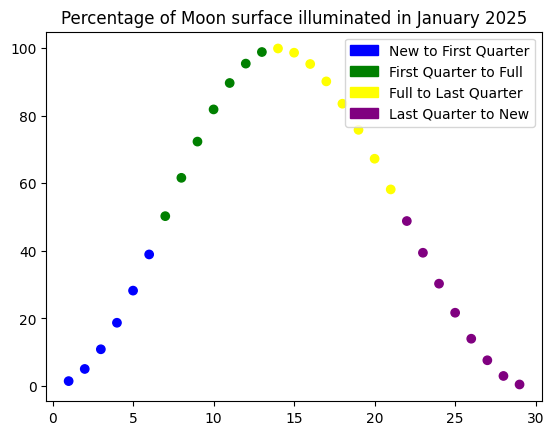

In [76]:
plt.scatter(range(1, 30), illumination_percentages, c=colors)
plt.title(f"Percentage of Moon surface illuminated in {YEAR}")
# for day in [first_quarter_moon_day, full_moon_day, last_quarter_moon_day]:
#   moon.compute(day)
#   plt.vlines(day, 0, illumination_percentages[day-1], color='black')
# plt.vlines(new_moon_day, illumination_percentages[new_moon_day-1], 1, color='black')
legends = [mpatches.Patch(color='blue', label='New to First Quarter'),
           mpatches.Patch(color='green', label='First Quarter to Full'),
           mpatches.Patch(color='yellow', label='Full to Last Quarter'),
           mpatches.Patch(color='purple', label='Last Quarter to New')]
plt.legend(handles=legends)
plt.show()

## Amplyfing for all year

In [77]:
# Track moon data from YEAR
illumination_percentages = []
for month in range(1, 13):
  days_in_month = 31 if month in [1, 3, 5, 7, 8, 10, 12] else 30
  if month == 2: days_in_month = 28
  for day in range (1, days_in_month+1):
    moon.compute(f'{YEAR}/{month}/{day}')
    illumination_percentages.append(moon.moon_phase*100)
len(illumination_percentages)

365

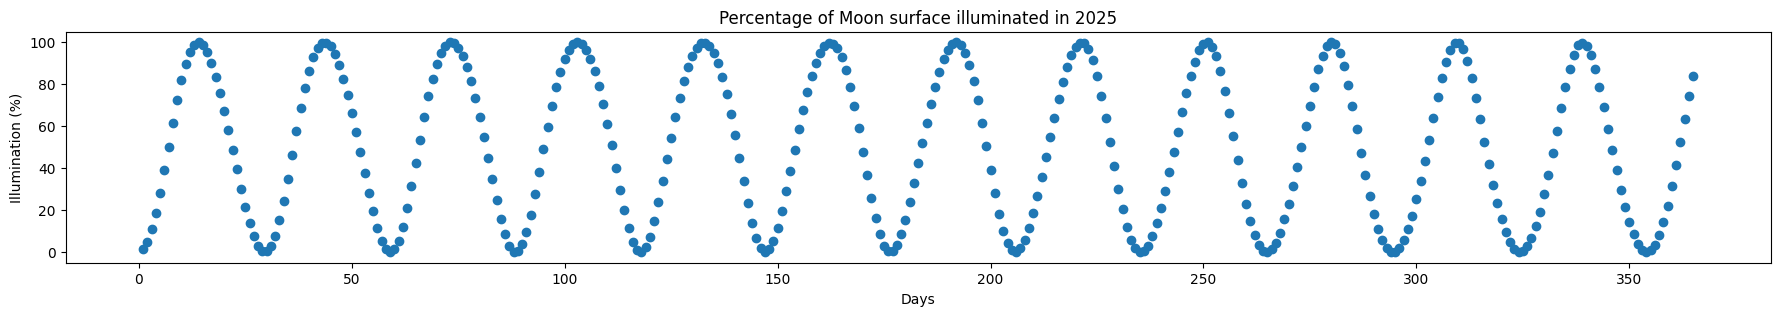

In [78]:
plt.figure(figsize=(22,3))
plt.scatter(range(1, 366), illumination_percentages)
plt.title(f"Percentage of Moon surface illuminated in {YEAR}")
plt.ylabel("Illumination (%)")
plt.xlabel("Days")
plt.show()

In [79]:
phases_days = []
# This is a utility dictionary to help iterate using the for loop below
phases_functions = {
    "first_quarter": ephem.next_first_quarter_moon,
    "full_moon": ephem.next_full_moon,
    "last_quarter": ephem.next_last_quarter_moon,
    "new_moon": ephem.next_new_moon
}
# Collect Data
for func in phases_functions.values():
  moon_date = func(YEAR)
  # While we still in the year
  while moon_date.triple()[0] == int(YEAR):
    # Converto to a python datatime.date object to use tm_yday function
    dt = date(moon_date.triple()[0], moon_date.triple()[1], int(moon_date.triple()[2]))
    # tm_yday returns the day number in the year like (1st January is 1, 31 December is 365)
    day_of_year = dt.timetuple().tm_yday
    phases_days.append(day_of_year)
    moon_date = func(moon_date)

phases_days.sort()
phases_days[:5], phases_days[-5:]

([6, 13, 21, 29, 36], [332, 338, 345, 354, 361])

In [80]:
# Now, similarly to the january version, we have to create our colors array to collorize our year plot
colors = []
class Color:
    value='blue'
    def next(self):
      if self.value == 'blue':
        self.value = 'green'
        return
      if self.value == 'green':
        self.value = 'yellow'
        return
      if self.value == 'yellow':
        self.value = 'purple'
        return
      self.value = 'blue'

color = Color()

for day in range (1, 366):
    colors.append(color.value)
    if(day in phases_days):
      color.next()
len(colors)

365

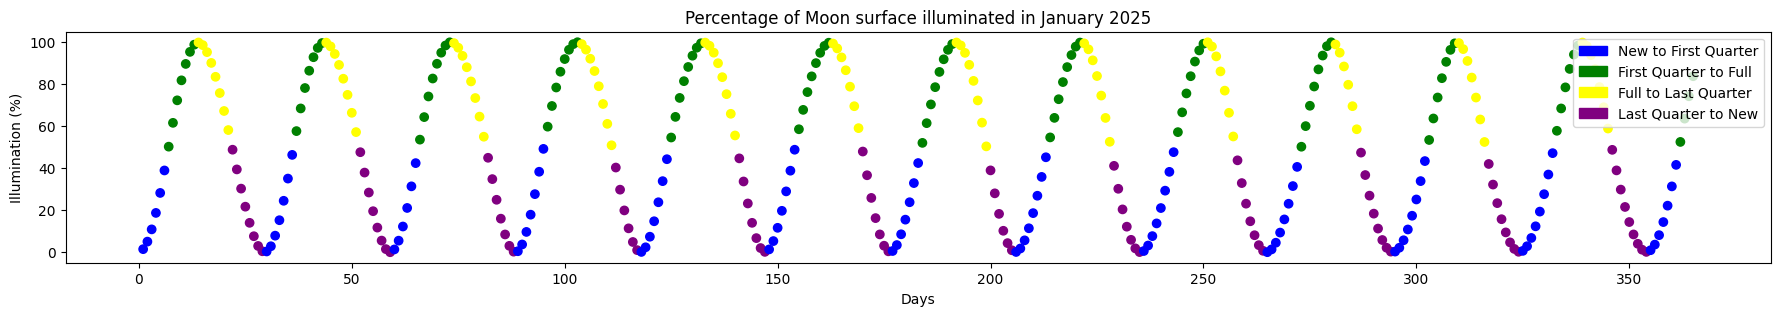

In [81]:
# Now we can just plot
plt.figure(figsize=(22,3))
plt.scatter(range(1, 366), illumination_percentages, c=colors)
plt.title(f"Percentage of Moon surface illuminated in January {YEAR}")
plt.ylabel("Illumination (%)")
plt.xlabel("Days")
legends = [mpatches.Patch(color='blue', label='New to First Quarter'),
           mpatches.Patch(color='green', label='First Quarter to Full'),
           mpatches.Patch(color='yellow', label='Full to Last Quarter'),
           mpatches.Patch(color='purple', label='Last Quarter to New')]
plt.legend(handles=legends, loc='upper right')
plt.show()

In [82]:
# An interesting thing about this data is that August 2025 is the only month to have two of the same phase events in this year
# Which is the first quarter event in day 1 and day 31.
# This behavior can be checked with this code:
print(ephem.next_first_quarter_moon(f'{YEAR}/08'))
d=ephem.next_first_quarter_moon(f'{YEAR}/08')
print(ephem.next_first_quarter_moon(d))

2025/8/1 12:41:16
2025/8/31 06:25:08
